**Nama : Nita Andriani <br>**
**NIM : 211351104 <br>**
**Kelas : Malam B**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nitaandriani","key":"bc3692eddb6f16878ae7972f4a0db2c8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rashadrmammadov/heart-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction
License(s): CC0-1.0
  0% 0.00/15.9k [00:00<?, ?B/s]
100% 15.9k/15.9k [00:00<00:00, 16.9MB/s]


In [ ]:
!mkdir heart-disease-prediction
!unzip heart-disease-prediction.zip -d heart-disease-prediction
!ls heart-disease-prediction

Archive:  heart-disease-prediction.zip
  inflating: heart-disease-prediction/heart_disease_dataset.csv  
heart_disease_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
df = pd.read_csv('heart-disease-prediction/heart_disease_dataset.csv')

In [ ]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
print(df.shape)

(1000, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [ ]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype== 'int64' :
      numerical.append(col)
    else:
      catgcols.append(col)

for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
numerical

['Age',
 'Cholesterol',
 'Blood Pressure',
 'Heart Rate',
 'Exercise Hours',
 'Stress Level',
 'Blood Sugar',
 'Heart Disease']

In [ ]:
catgcols

['Gender',
 'Smoking',
 'Alcohol Intake',
 'Family History',
 'Diabetes',
 'Obesity',
 'Exercise Induced Angina',
 'Chest Pain Type']

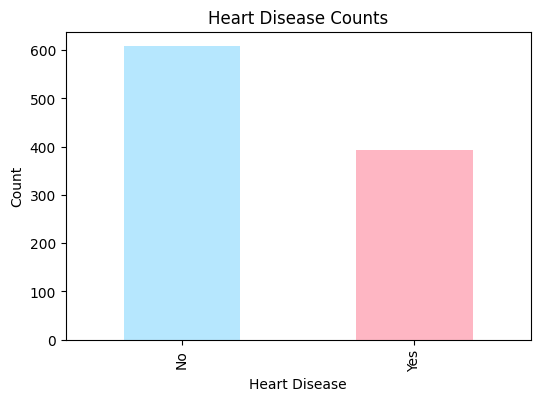

In [ ]:
heart_disease_counts = df['Heart Disease'].value_counts()

# Plot
plt.figure(figsize=(6, 4))  # Ukuran plot (opsional)
colors = ['#B6E7FE', '#FEB6C3']
heart_disease_counts.plot(kind='bar', color=colors)  # Jenis plot 'bar' untuk bar chart
plt.title('Heart Disease Counts')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Label sumbu x
plt.show()


In [ ]:
ind_col = [col for col in df.columns if col != 'Heart Disease']
dep_col = 'Heart Disease'

In [ ]:
le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [ ]:
X = df[ind_col] #features
y = df[dep_col] #label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print("X_train shape : ", X_train.shape)

X_train shape :  (800, 15)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.001, weight_decay=0.004)
model.compile(loss='binary_crossentropy', optimizer=optimizer , metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2048      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12417 (48.50 KB)
Trainable params: 12417 (48.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


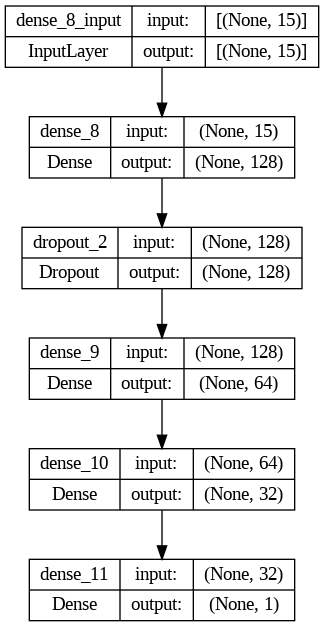

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
20/20 [==============================] - 1s 19ms/step - loss: 4.9964 - accuracy: 0.5203 - val_loss: 1.1651 - val_accuracy: 0.5437
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 2.5140 - accuracy: 0.5406 - val_loss: 0.9069 - val_accuracy: 0.7125
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 1.7840 - accuracy: 0.6172 - val_loss: 0.5051 - val_accuracy: 0.8062
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 1.4314 - accuracy: 0.6203 - val_loss: 0.5983 - val_accuracy: 0.7750
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 1.3622 - accuracy: 0.6266 - val_loss: 0.4169 - val_accuracy: 0.7812
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9316 - accuracy: 0.6672 - val_loss: 0.5050 - val_accuracy: 0.7375
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9091 - accuracy: 0.6641 - val_loss: 0.3345 - val_accuracy: 0.8438
Epoch 8/100


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

7/7 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8850
Test Accuracy: 0.8849999904632568


In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.8850


[0.2958262264728546, 0.8849999904632568]

In [ ]:
df.tail()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,0,269,111,86,2,0,5,0,1,1,10,120,0,2,1
996,78,0,334,145,76,2,0,6,0,0,0,10,196,1,3,1
997,79,1,151,179,81,2,1,4,1,0,1,8,189,1,0,0
998,60,0,326,151,68,1,0,8,1,1,0,5,174,1,1,1
999,53,1,226,116,82,0,0,6,0,0,1,5,161,1,0,1


In [ ]:
prediction = model.predict([[56,	0,	269,	111,	86,	2,	0,	5,	0,	1,	1,	10,	120,	0,	2]])
pred = prediction[0]
print(pred)

if pred > 0.5:
  print("Pasien Positif Memiliki Penyakit Jantung")
else:
  print("Pasien Negatif Memiliki Penyakit Jantung")


1/1 [==============================] - 0s 100ms/step
[0.8045726]
Pasien Positif Memiliki Penyakit Jantung


In [ ]:
prediction = model.predict([[79,	1,	151,	179,	81,	2,	1,	4,	1,	0,	1,	8,	189,	1,	0]])
pred = prediction[0]
print(pred)

if pred > 0.5:
  print("Pasien Positif Memiliki Penyakit Jantung")
else:
  print("Pasien Negatif Memiliki Penyakit Jantung")


1/1 [==============================] - 0s 42ms/step
[2.2284773e-06]
Pasien Negatif Memiliki Penyakit Jantung


7/7 [==============================] - 0s 3ms/step


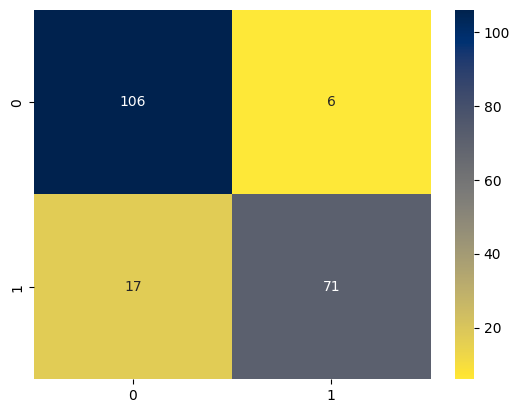

In [ ]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

In [ ]:
model.save('./heart.h5')
model = tf.keras.models.load_model('./heart.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heart.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15816